In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# You can download the CSV from the link provided in the task sheet
# and place it in the same directory as your code.
df = pd.read_csv('titanic.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataset Info:")
df.info()

# Check for the number of null values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [19]:
# This is clear: fill the values, then replace the original column
# Fill missing 'Age' values with the median age
median_age = df['Age'].median()
df.fillna({'Age': median_age}, inplace=True)


In [20]:
# Fill missing 'Embarked' values with the mode
mode_embarked = df['Embarked'].mode()[0]
df.fillna({'Embarked': mode_embarked}, inplace=True)

In [21]:
# Drop the 'Cabin' column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

In [22]:
# Convert 'Sex' and 'Embarked' into numerical features using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# After encoding, the original 'Sex' and 'Embarked' columns are replaced
# by new binary columns (e.g., Sex_male, Embarked_Q, Embarked_S).
# `drop_first=True` avoids multicollinearity by dropping one category per feature.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

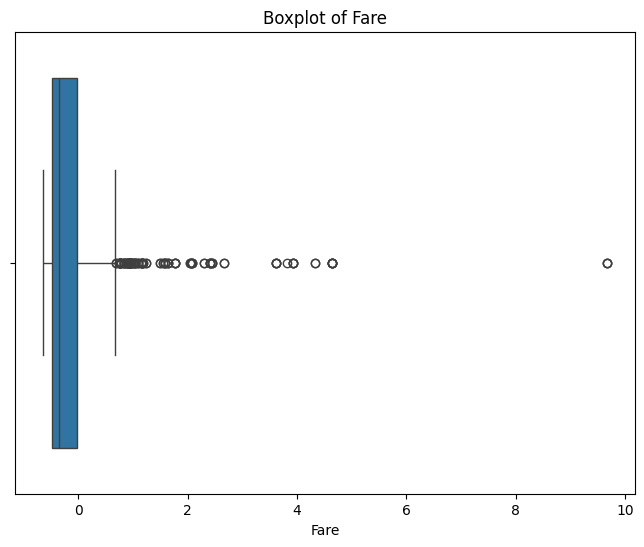

In [24]:
# Visualize outliers in 'Fare' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [25]:
# Calculate Q1, Q3, and IQR for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Dataset shape after removing Fare outliers: {df_no_outliers.shape}")


Original dataset shape: (891, 12)
Dataset shape after removing Fare outliers: (775, 12)
